# **Documentation**

##✔️ **Answer Questions**

 **What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?**

**1-**
* `Character N-Grams it is split each words based on character but ` 
 `word N-Grams it is split whole text based on words`
* `For a given document in a language, there are more character N-grams repetitions than word n-gram repetitions`

 `character N-grams split highlights some common properties that a word n-gram split does not`

 ` character N-grams make languages more comparable revealing more repeated`

**2-**
* `Word n-gram tends to suffer more from OOV (Out-Of-Vocabulary) issue because of the new words that presented in the testing dataset and not appear in training dataset`

---

**What is the difference between stop word removal and stemming? Are these techniques language-dependent?**

**1-**
* `Stop word removal and stemming are commonly used method in indexing the different between them are ` 

* `Stop word removal Some common words that are present in text but do not contribute in the meaning of a sentence. Such words are not at all important for the purpose of information retrieval or natural language processing. The most common stopwords are ‘the’ and ‘a’.` 

* `Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.`

**2-**
* `yes, these techniques are language-dependent`


---

 **Is tokenization techniques language dependent? Why?**

* `Tokenization is breaking the raw text into small chunks and helps in interpreting the meaning of the text by analyzing the sequence of the words
so it is language dependent `
* `becouse it needs to know meaning of each word to split it depend on language`
`for example: wasn't>> wasnt>>was n't>>wasn t >> these all possable of tokenization but some of these doesn't have meaning in the language `


---

**What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

**1-**
* `TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.`

* `In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.`



* `In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.`

**2-**
* `it isn't feasible to use all possible n-grams`

```
N-gram range sets if features to be used to characterize texts will be:
Unigrams or words (n-gram size = 1)
Bigrams or terms compounded by two words (n-gram size = 2)
Trigrams or terms compounded by up to three words (n-gram size = 3)
```


```
I should select between them depend on problem like :
Sentiment Analysis, setting n-gram ranges that use bigrams 
or trigrams can dramatically improve the accuracy of classification,
as they can capture more complex expressions formed by the composition of more
than one word. The rationale is that in Sentiment Analysis the outcome depends
not only on the frequency of words but also on how they are combined:
good has a different meaning alone than when preceded by a not as in not good.
```


---

### ✔️ **Problem Formulation**

**Define the problem:**
* `the problem is how are we  going to predict if a specific reddit(website) post is fake news or not`

**What is the input:**  
* `the input is text that has a lot of rows containing fake news and right news and has some noise needed be cleaned`

**What is the output:**
* `predict if the news are fake news or True news`

**What data mining function is required:**
* `data mining function is required  classification problem`

**What could be the challenges**
* `the challenges are to clean the text data by Preprocessing techniques in NLP to make the sentence pure to predict correctly and choose best classifier for this mission.`

**What is the impact:**

* `Reducing the spread of rumors and fake news`

**What is an ideal solution:**

`the ideal solution is getting high accuracy for predict which fake or true news,and which model perfect to train input text (NLP or text classification) in this proplem randomforest classifier is the best and logestic regresion` 



---

## **Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st#Common string operations
import re#Regular expression operations
import nltk#Natural Language Toolkit
from nltk.tokenize import word_tokenize#Tokenizers divide strings into lists of substrings
from nltk.corpus import stopwords#remove stop words
from sklearn.pipeline import Pipeline#create pipline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV#model tuning
from xgboost import XGBClassifier#XGBClassifier model for classification
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split#split text into train and test 
from sklearn.feature_extraction.text import TfidfVectorizer#vectorize text into numeric useing Tfidf
import warnings #handling warning 
warnings.filterwarnings('ignore')

## **Download Pakages**

In [ ]:
nltk.download('punkt')#download punkt pakages from nltk library
nltk.download('stopwords')#download stopwords pakages from nltk library
nltk.download('wordnet')#download wordnet pakages from nltk library

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

##**Read Train Data**

In [ ]:
# Read raw data (train data)
FILE_REVIEWS = "xy_train.csv"
data = pd.read_csv(FILE_REVIEWS, sep=",", na_values=[""])

In [ ]:
#take copy from original file
data_train=data.copy()

In [ ]:
#drop id
data_train=data_train.drop(['id'],axis=1)

## **Label Of Train Data**

In [ ]:
#label of our data 
y_train=data_train['label']

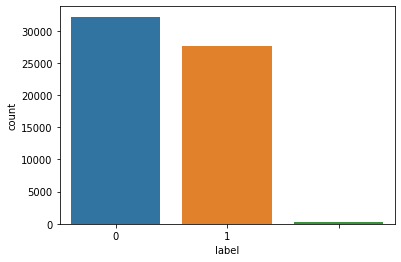

In [ ]:
#check balance of data
import matplotlib.pyplot as plt #to visualization 
import seaborn as sns#to visualization
g = sns.countplot(y_train)
g.set_xticklabels([0,1])
plt.show()



```
As we see there are label equal=2 and our label 0 or 1 only so i will drop it 
```



In [ ]:
#drop row of label equal 2
data_train = data_train[data_train.label!= 2]

In [ ]:
#label of our data 
y_train=data_train['label']

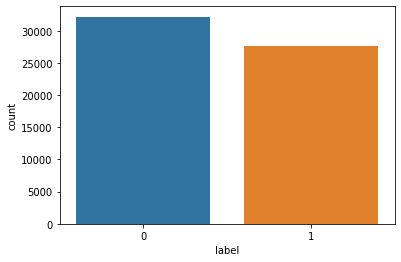

In [ ]:
#check balance of data after drop rows have value 2
g = sns.countplot(y_train)
g.set_xticklabels([0,1])
plt.show()

In [ ]:
data_train#data befor any preprocessing 

,text,label
0,A group of friends began to volunteer at a hom...,0
1,British Prime Minister @Theresa_May on Nerve A...,0
2,"In 1961, Goodyear released a kit that allows P...",0
3,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0
...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0
59996,Nigerian Prince Scam took $110K from Kansas ma...,1
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0
59998,Julius Caesar upon realizing that everyone in ...,0




---

## **Trial_1**

## **Cleaning and pre processing**


* **Steps**

```
-Removing HTML characters,ASCII
-Convert Text to Lowercase
-Remove Punctuation's
-Remove Stop words
-Tokenization
-Stemming vs Lemmatization(which one to choose?)

```



**Text clean**

In [ ]:
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

In [ ]:
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of converting a word to its base form
from nltk.corpus import stopwords#we remove the low-level information from our text in order to give more focus to the important
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer() 

In [ ]:
# convert all whitespaces (tabs etc.) to single wspace
# all lowercase
#remove stopwords, punctuation and stemm
#Keep only ASCII + European Chars and whitespace, no digits
#remove any html tags (< /br> often found)
import string
def text_clean(text,for_embedding=True):#I will apply embedding 
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)    
    text = text.lower()
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:#apply stemmer
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
data_train['text_clean'] = data_train['text'].apply(text_clean)#apply function text_clean on text data 

In [ ]:
data_train

,text,label,text_clean
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...
...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...


In [ ]:
X_train=data_train['text_clean']#define variable by new data that cleaned 

In [ ]:
from pandas.core.frame import DataFrame
DataFrame(X_train)#just show data by dataframe

,text_clean
0,group of friends began to volunteer at homeles...
1,british prime minister theresa may on nerve at...
2,"in , goodyear released kit that allows ps to b..."
3,"happy birthday , bob barker ! the price is rig..."
4,obama to nation innocent cops and unarmed youn...
...,...
59995,finish sniper simo yh during the invasion of f...
59996,nigerian prince scam took from kansas man year...
59997,is it safe to smoke marijuana during pregnancy...
59998,julius caesar upon realizing that everyone in ...


## **Split and validationset**

In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)#split data to ttrain and validation 

In [ ]:
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train1, y_train1, train_size = 0.8, stratify = y_train1, random_state = 2022)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
#TF-IDF are word frequency scores that try to highlight words that are more interesting
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2),
)

In [ ]:
vectorizer.fit(X_train)#fit text to apply vectorization

TfidfVectorizer(max_df=0.6, min_df=10, ngram_range=(1, 2))

In [ ]:
X_train_transformed = vectorizer.transform(X_train)#apply transform

In [ ]:
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 21030)
y_train (59768,)


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression#classifier for train the data 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#use pipline and gridsearch to tuning hyperparameter 
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],#l2 regularization
          'Log_reg__C' : [0.6,0.9,1,1.3,1.4,1.6],#The parameter C is the the inverse of regularization strength in Logistic Regression
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_transformed,y_train)
#print best score
print(f'Best_score = {param_grid.best_score_}')
#print best Params
print(f'Best_params = {param_grid.best_params_}')

Fitting 1 folds for each of 60 candidates, totalling 60 fits
Best_score = 0.8879981495788997
Best_params = {'Log_reg__C': 1.6, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'liblinear'}
CPU times: user 2.59 s, sys: 1.17 s, total: 3.76 s
Wall time: 38.6 s




---

## **Test Data**

In [ ]:
# Read raw of train data
FILE_REVIEWS = "x_test.csv"
df = pd.read_csv(FILE_REVIEWS)
df

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House...
59148,59148,Napoleon returns from his exile on the island ...
59149,59149,Deep down he always wanted to be a ballet dancer


In [ ]:
data_test=df.copy()#copy data from original file 

In [ ]:
data_test=data_test.drop(['id'],axis=1)#drop id columns 

In [ ]:
data_test.isnull().sum()#check null values

text    0
dtype: int64

In [ ]:
data_test['text_clean'] = data_test['text'].apply(text_clean)#apply func text_clean on test data 

In [ ]:
X_test=data_test['text_clean']#assign the new data to variable

In [ ]:
DataFrame(X_test)#just show the data 

,text_clean
0,stargazer
1,yeah
2,pd phoenix car thief gets instructions from yo...
3,"as trump accuses iran , he has one problem his..."
4,believers hezbollah
...,...
59146,bicycle taxi drivers of new delhi
59147,trump blows up gop formula for winning house r...
59148,napoleon returns from his exile on the island ...
59149,deep down he always wanted to be ballet dancer


In [ ]:
X_test_transformed = vectorizer.transform(X_test)#apply vectorization on test data 

In [ ]:
print('X_test_transformed', X_test_transformed.shape)#check shape of test data 

X_test_transformed (59151, 21030)


In [ ]:
y_pred=param_grid.predict_proba(X_test_transformed)#predict yhat

In [ ]:
y_pred

array([[0.49803348, 0.50196652],
       [0.83913674, 0.16086326],
       [0.28132142, 0.71867858],
       ...,
       [0.8956773 , 0.1043227 ],
       [0.79407826, 0.20592174],
       [0.14170906, 0.85829094]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('sample_submission_1.csv', index=False)

### **OBSERVATION_1**
```
trail1:
1-using grid search tuning 
2-using validation set and logestic regresion
3-using TfidfVectorizer analyzer word 
when I apply for_embedding=True the score is
Private Score: 0.85850
Public score: 0.86018
when I apply for_embedding=False the score is
Private Score:0.83451
Public score:0.83231
```

**hyperparameter of logestic**
```
1-Penalized logistic regression imposes a penalty to the logistic model 
for having too many variables. This results in shrinking the 
coefficients of the less contributive variables toward zero. 
This is also known as regularization.
```


```
2-A high value of C tells the model to give high weight to the 
training data, and a lower weight to the complexity penalty
```



```
3-with class_weight="balanced" you capture more true events 
(higher TRUE recall) but also you are more likely to get false alerts (lower TRUE precision)
```



```
Solver :It's a linear classification that supports logistic regression and 
linear support vector machines. The solver uses a Coordinate Descent 
(CD) algorithm that solves optimization problems by successively 
performing approximate minimization along coordinate directions or 
coordinate hyperplanes.
```






# **Trail_2**

In [ ]:
#data before preprocessing
X_train=data_train['text_clean']

* **Features in Bag of Words**

* `N-grams (sets of consecutive words)`
* `N=2`
*` Min_df ignores terms that have a document frequency (presence in % of documents).`
* `min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents`
*`When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label.`
* `Max_features :Limit the amount of features (vocabulary) that the vectorizer will learn`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object: count_vectorizer
Count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2),max_df=0.3, min_df=10, max_features=None,strip_accents='unicode',token_pattern=r'\w{2,}')

In [ ]:
# Transforms the data into a bag of words
Count_train = Count_vec.fit(X_train)
X_train_trans= Count_vec.transform(X_train)

In [ ]:
print('X_train_transformed', X_train_trans.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 11393)
y_train (59768,)


* `Use log_reg for modeling`

In [ ]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [0.8],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_trans,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score = 0.8674251391097332
Best_params = {'Log_reg__C': 0.8, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'liblinear'}
CPU times: user 5.76 s, sys: 2.29 s, total: 8.05 s
Wall time: 3min 52s


**Test Data**

In [ ]:
X_test=data_test['text_clean']

In [ ]:
X_test_trans= Count_vec.transform(X_test)

In [ ]:
print('X_train_transformed', X_test_trans.shape)

X_train_transformed (59151, 11393)


In [ ]:
y_pred2=param_grid.predict_proba(X_test_trans)

In [ ]:
#prediction file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred2[:,1]

submission.to_csv('sample_submission_2.csv', index=False)

**OBSERVATION_2**


```
trail2:
1-using grid search tuning 
2-using cv and logestic regresion
3-using CountVectorizer analyzer word 
when I apply for_embedding=True the score is
private Score: 0.81896
Public score: 0.82004
this mean that TfidfVectorizer is best than CountVectorizer

```

```
CountVectorizer:
Convert a collection of text documents to a matrix of token counts. 
This implementation produces a sparse representation of the counts using scipy
```


```
Which is better CountVectorizer or Tfidfvectorizer?
TF-IDF is better than Count Vectorizers because it not only focuses on 
the frequency of words present in the corpus but also provides the 
importance of the words. We can then remove the words that are 
less important for analysis, hence making the model building less 
complex by reducing the input dimensions
```









---

#**Trail_3**
* `Lemmatizing and stemming gives us a lower ROC-AUC score. So we will only clean \\n's, Username, IP and http links`

In [ ]:
data_train

,text,label,text_clean,clean_text
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b...","in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig...","happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...,obama to nation innocent cops and unarmed youn...
...,...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...,julius caesar upon realizing that everyone in ...


In [ ]:
import time
start_time=time.time()
# remove '\\n'
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.7736074924468994


In [ ]:
data_train

,text,label,text_clean,clean_text
0,A group of friends began to volunteer at a hom...,0,group of friends began to volunteer at homeles...,group of friends began to volunteer at homeles...
1,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa may on nerve at...,british prime minister theresa may on nerve at...
2,"In 1961, Goodyear released a kit that allows P...",0,"in , goodyear released kit that allows ps to b...","in , goodyear released kit that allows ps to b..."
3,"Happy Birthday, Bob Barker! The Price Is Right...",0,"happy birthday , bob barker ! the price is rig...","happy birthday , bob barker ! the price is rig..."
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama to nation innocent cops and unarmed youn...,obama to nation innocent cops and unarmed youn...
...,...,...,...,...
59995,Finish Sniper Simo H盲yh盲 during the invasion o...,0,finish sniper simo yh during the invasion of f...,finish sniper simo yh during the invasion of f...
59996,Nigerian Prince Scam took $110K from Kansas ma...,1,nigerian prince scam took from kansas man year...,nigerian prince scam took from kansas man year...
59997,Is It Safe To Smoke Marijuana During Pregnancy...,0,is it safe to smoke marijuana during pregnancy...,is it safe to smoke marijuana during pregnancy...
59998,Julius Caesar upon realizing that everyone in ...,0,julius caesar upon realizing that everyone in ...,julius caesar upon realizing that everyone in ...


In [ ]:
X_train=data_train['clean_text'] 

In [ ]:
# Instantiate the vectorizer
vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=8, ngram_range=(1, 2), norm="l2",token_pattern=r'\w{1,}',stop_words='english'
)


In [ ]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_word_features =vectorizer.transform(X_train)

In [ ]:
print('X_train_transformed', X_train_word_features.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 678)
y_train (59768,)


In [ ]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [1.6],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_word_features,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score = 0.7517766269288313
Best_params = {'Log_reg__C': 1.6, 'Log_reg__class_weight': None, 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'liblinear'}
CPU times: user 3.9 s, sys: 280 ms, total: 4.18 s
Wall time: 2min


**Test Data**

In [ ]:
import time
start_time=time.time()
# remove '\\n'
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.501406192779541


In [ ]:
X_test=data_test['clean_text'] 

In [ ]:
X_test_word_features = vectorizer.transform(X_test)

In [ ]:
print('X_test_transformed', X_test_word_features.shape)

X_test_transformed (59151, 678)


In [ ]:
y_pred3=param_grid.predict_proba(X_test_word_features)

In [ ]:
y_pred3

array([[0.77616083, 0.22383917],
       [0.2047805 , 0.7952195 ],
       [0.77300679, 0.22699321],
       ...,
       [0.77345992, 0.22654008],
       [0.46323205, 0.53676795],
       [0.43900379, 0.56099621]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred3[:,1]

submission.to_csv('sample_submission_3.csv', index=False)

* **OBSERVATION_3**

```
trail3:
1-using grid search tuning 
2-using cv and logestic regresion
3-using TfidfVectorizer analyzer char
4-additional cleaning for  text 
when I apply for_embedding=True the score is

private Score: 0.70632
Public score: 0.70482
this mean that TfidfVectorizer(word) is best than TfidfVectorizer(char)
```





---

# **Trail_4**

* `Vectorize, Classify (with parameter tuning)`

In [ ]:
X_train=data_train['text_clean'] 

In [ ]:
#data without any preprocessing
print(X_train.shape)
print(y_train.shape)

(59768,)
(59768,)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
start_time=time.time()

pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}', #accept tokens that have 1 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 2),
                                    min_df=10),
                     OneVsRestClassifier(LogisticRegression()))
param_grid = {
              #'tfidfvectorizer__max_features': [10000, 30000],
              'onevsrestclassifier__estimator__C': [0.9,1,2,2.5],
              'onevsrestclassifier__estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             } 
grid = GridSearchCV(pipe, param_grid, cv=12, scoring='roc_auc')

grid3 = grid.fit(X_train, y_train)

end_time=time.time()
print("total time",end_time-start_time)
print(f'Best_score = {grid3.best_score_}')
print(f'Best_params = {grid3.best_params_}')

total time 1076.1216955184937
Best_score = 0.8739087760313816
Best_params = {'onevsrestclassifier__estimator__C': 1, 'onevsrestclassifier__estimator__solver': 'lbfgs'}


**Test Data**

In [ ]:
X_test=data_test['text_clean']

In [ ]:
y_pred4=grid3.predict_proba(X_test)
y_pred4

array([[0.54712372, 0.45287628],
       [0.82736412, 0.17263588],
       [0.42575294, 0.57424706],
       ...,
       [0.9461845 , 0.0538155 ],
       [0.64565491, 0.35434509],
       [0.22034321, 0.77965679]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred4[:,1]

submission.to_csv('sample_submission_4.csv', index=False)

*  **OBSERVATION_4**


```
Trail_4 
1- using pipline for TfidfVectorizer(word)
2-cv=12 with grid search 
3-using OneVsRestClassifier (logestic regresion) 
private Score: 0.83269
Public score: 0.83228`
```





---

# **Trail_5**

In [ ]:
# X_train=data_train['text'] 
X_train=data_train['text_clean']

In [ ]:
%%time
# cv=pds means depending on PredefinedSplit
# n_jobs=2 means the cucurrent number of jobs
# scoring depends on roc_auc
# i used n_iter=10 
from sklearn.ensemble import RandomForestClassifier # to use RandomForestClassifier model for my data

pipe= Pipeline([("tfidf", TfidfVectorizer(analyzer='word')),
        ('my_classifier', 
           RandomForestClassifier(),
        )])

param_grid = {
    # 'tfidf_numimputer_strategy': ['mean'],
    # preprocessor_numimputer_strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    # 'my_classifier__n_estimators'
     'my_classifier__criterion' :['gini'],
     'my_classifier__n_estimators': [500], 
     # my_classifier__n_estimators points to my_classifier->n_estimators 
         
}

rf_random = RandomizedSearchCV(
    pipe, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

# fit Random_search
rf_random.fit(X_train, y_train)

# print best_score and best_params for Random_search
print('best score {}'.format(rf_random.best_score_))
print('best score {}'.format(rf_random.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8637651185161614
best score {'my_classifier__n_estimators': 500, 'my_classifier__criterion': 'gini'}
CPU times: user 20min 25s, sys: 4.97 s, total: 20min 30s
Wall time: 27min 6s


## **Test_data**

In [ ]:
X_test=data_test['text_clean'] 

In [ ]:
# X_test_vectorizer = word_vectorizer.transform(X_test)

In [ ]:
y_pred5=rf_random.predict_proba(X_test)
y_pred5

array([[0.89543814, 0.10456186],
       [0.89675119, 0.10324881],
       [0.35901111, 0.64098889],
       ...,
       [0.82      , 0.18      ],
       [0.686     , 0.314     ],
       [0.29152399, 0.70847601]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred5[:,1]

submission.to_csv('sample_submission_5.csv', index=False)

* **OBSERVATION_5**


```
Trail_5:

1-Useing RandomForestClassifier model for my data
2-using pipline and TfidfVectorizer (word)
3-using RandomizedSearchCV for tuning parameters
public Score: 0.87621
Private score: 0.87563
this mean that RandomForestClassifier is best classifier for this data
```





---


## **Trail_6**

In [ ]:
# X_train=data_train['text'] 
X_train=data_train['text_clean']

In [ ]:
from xgboost import XGBClassifier

In [ ]:
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)

In [ ]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_vectorizer = vectorizer.transform(X_train)

In [ ]:
# My_classifier
xgb = XGBClassifier(silent=False, 
                      
                      objective='binary:logistic',
                      #     colsample_bytree=0.4,
                      #     gamma=10,
                      #  learning_rate=0.05,
                      #    max_depth=10 ,
                      #   n_estimators=700,
                      #    subsample=0.8 
                      )

full_pipline = Pipeline(
    steps=[
        ('my_classifier', xgb )
    ]
)
full_pipline

Pipeline(steps=[('my_classifier', XGBClassifier(silent=False))])

In [ ]:
full_pipline = full_pipline.fit(X_train_vectorizer,y_train)

In [ ]:
# here we specify the search space

param_grid = {
      'my_classifier__n_estimators': [700],  
      'my_classifier__max_depth':[10] ,
      'my_classifier__subsample':[0.8] ,
      'my_classifier__gamma':[10],           
# 
}

# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train_vectorizer, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


**Test Data**

In [ ]:
X_test=data_test['text_clean'] 

In [ ]:
X_test_vectorizer = vectorizer.transform(X_test)

In [ ]:
y_pred6=grid_search.predict_proba(X_test_vectorizer)
y_pred6

In [ ]:
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred6[:,1]

submission.to_csv('sample_submission_6.csv', index=False)

* **OBSERVATION_6**


```
1-using XGBClassifier
2-using pipline and grid_search tuning 
3-using TfidfVectorizer
(colsample_bytree=0.4, gamma=10,
learning_rate=0.05, max_depth=10 n_estimators=700,
silent=False,   subsample=0.8)
private score  :0.79221
public score :0.79512
```

